In [89]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [90]:
import re
import mailbox
import csv

In [91]:
temp_rain_soil = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [92]:
temp_rain_soil.tail()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2023-08-23 00:00:00,11.0,0.0,50.77650,11.90
2023-08-23 01:00:00,11.0,0.0,50.82350,11.90
2023-08-23 02:00:00,11.0,0.0,50.82475,11.90
2023-08-23 03:00:00,11.0,0.0,50.85500,11.65
2023-08-23 04:00:00,10.0,0.0,50.95325,11.60


In [93]:
temp_rain_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44946 entries, 2018-07-07 11:00:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp       44946 non-null  float64
 1   Rain(mm)   44946 non-null  float64
 2   SoilMoist  44946 non-null  float64
 3   SoilTemp   44946 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


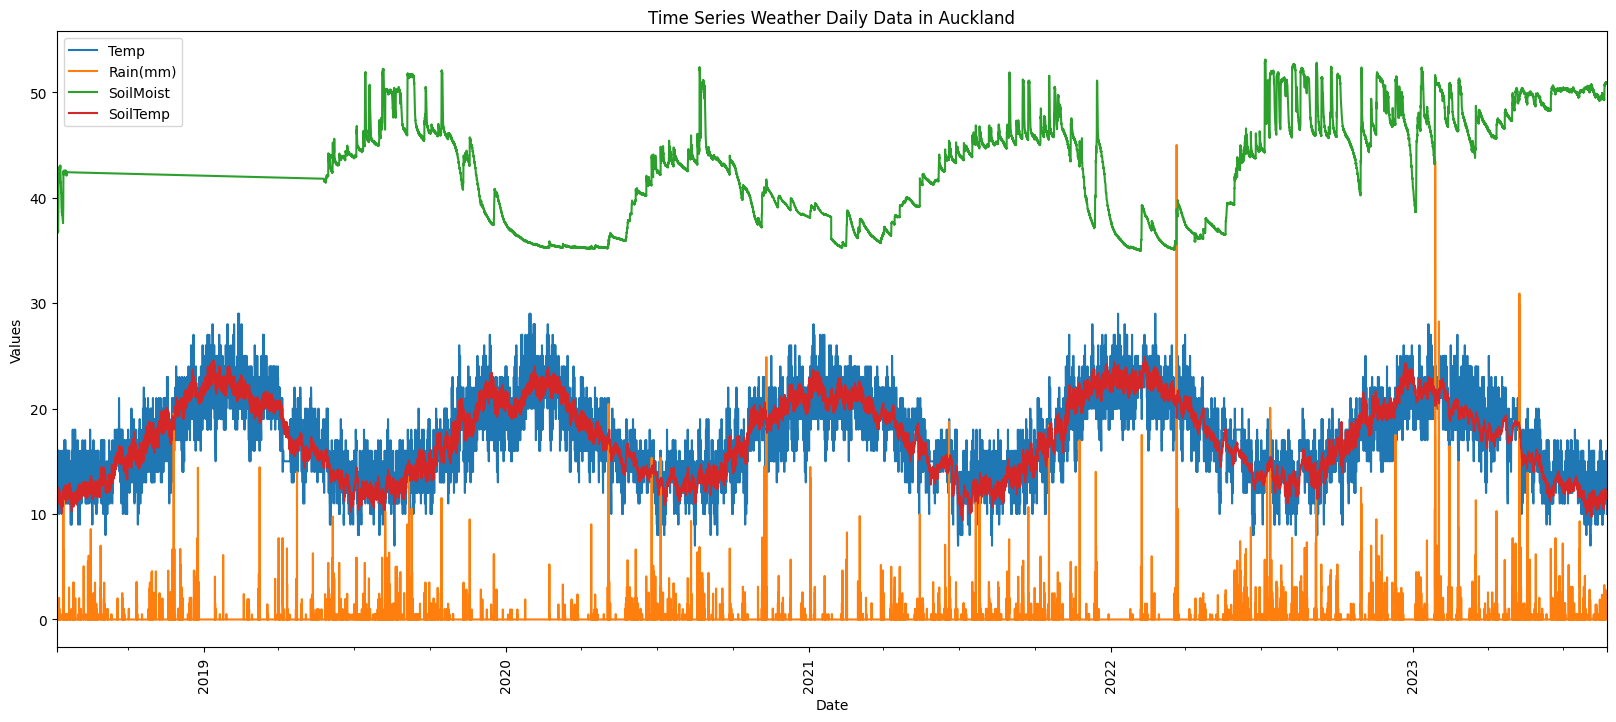

In [94]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
temp_rain_soil.plot(ax=ax)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Weather Daily Data in Auckland')

# Show the plot
plt.show()

In [95]:
daily_means  = temp_rain_soil.resample('D').mean()
monthly_means  = temp_rain_soil.resample('M').mean()
quater_means = temp_rain_soil.resample('Q').mean()
annual_means = temp_rain_soil.resample('A').mean()

print("Daily Means:\n", daily_means.head())
print("Monthly Means:\n", monthly_means.head())
print("Seasonal Means:\n", quater_means.head())
print("Annual Means:\n", annual_means.head())

Daily Means:
                             Temp  Rain(mm)  SoilMoist   SoilTemp
Timestamp (UTC+12:00)                                           
2018-07-07             14.615385  0.000000  37.340846  11.051923
2018-07-08             14.416667  0.168333  36.910969  11.355208
2018-07-09             14.125000  0.189167  40.972479  12.148958
2018-07-10             12.416667  0.252083  42.747975  11.923958
2018-07-11             12.583333  0.042083  42.726773  11.413542
Monthly Means:
                             Temp  Rain(mm)  SoilMoist   SoilTemp
Timestamp (UTC+12:00)                                           
2018-07-31             13.443124  0.162750  41.594260  11.656154
2018-08-31             13.530914  0.152742  42.356041  12.466767
2018-09-30             13.988889  0.069514  42.295490  14.204931
2018-10-31             15.521505  0.088790  42.234940  16.206915
2018-11-30             17.161111  0.140556  42.174389  18.405514
Seasonal Means:
                             Temp  Rain(mm) 

C:\Users\Ying\AppData\Local\Temp\ipykernel_9240\3902444868.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means  = temp_rain_soil.resample('M').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_9240\3902444868.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quater_means = temp_rain_soil.resample('Q').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_9240\3902444868.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_means = temp_rain_soil.resample('A').mean()


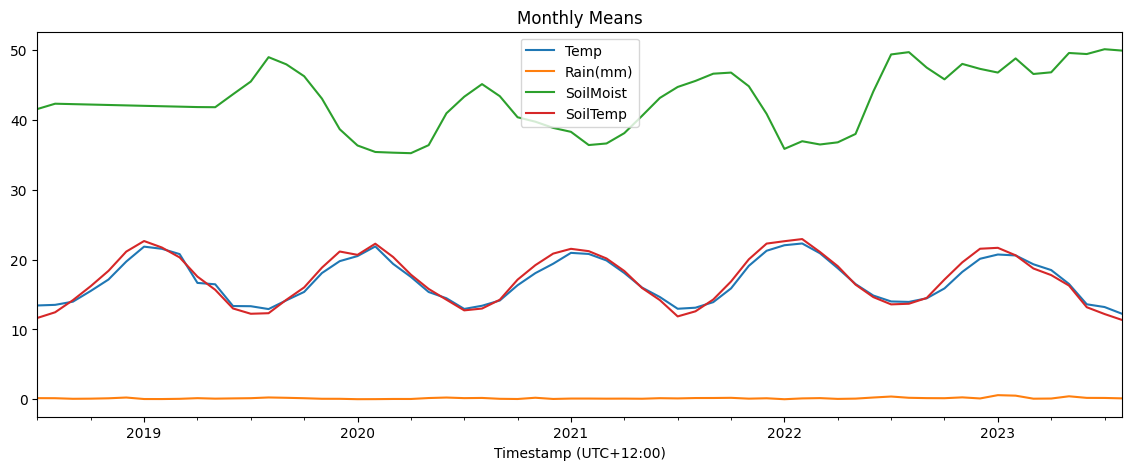

In [96]:
monthly_means[['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']].plot(figsize=(14, 5))
plt.title('Monthly Means')
plt.show()

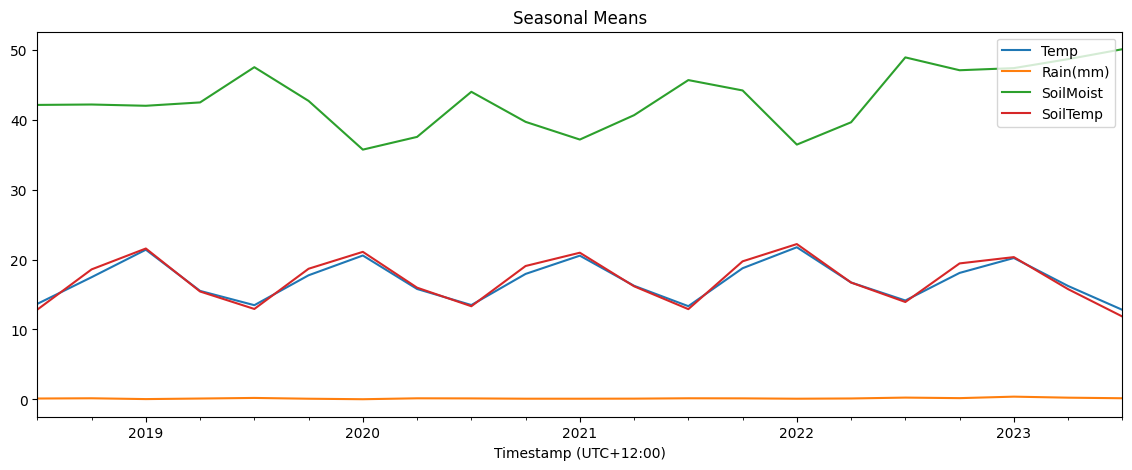

In [97]:
quater_means[['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']].plot(figsize=(14, 5))
plt.title('Seasonal Means')
plt.show()

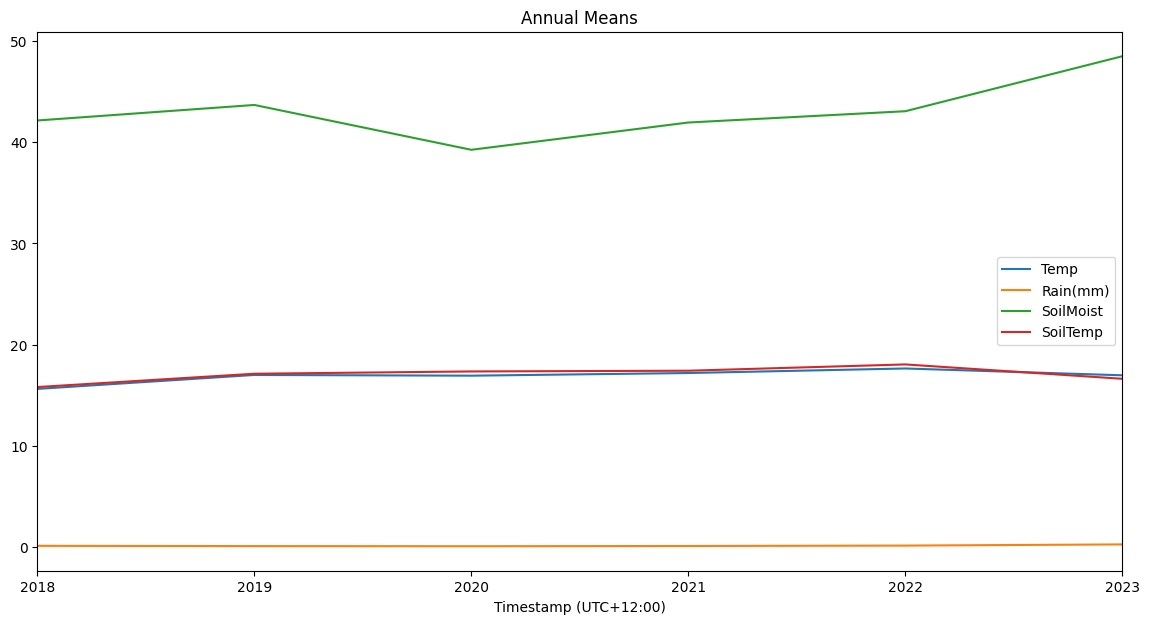

In [98]:
annual_means[['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']].plot(figsize=(14, 7))
plt.title('Annual Means')
plt.show()

In [99]:
start_date = '2020-01-01'
end_date = '2023-12-31'
data_subset = temp_rain_soil.loc[start_date:end_date]


# Find the row with the minimum soil moisture value
extreme_low = data_subset.loc[data_subset['SoilMoist'].idxmin()]

# Print the row with extreme low soil moisture
print("Row with extreme low soil moisture:")
print(extreme_low)

Row with extreme low soil moisture:
Temp         23.00000
Rain(mm)      0.00000
SoilMoist    34.97325
SoilTemp     22.90000
Name: 2022-02-05 13:00:00, dtype: float64


In [100]:
temp_rain_soil = temp_rain_soil.dropna()

In [101]:
# Select a range of dates for everyday
daily_tempRainSoil = temp_rain_soil.loc['2018-07-01 11:00:00':'2024-07-01 11:00:00': 24]

print(daily_tempRainSoil)

                       Temp  Rain(mm)  SoilMoist  SoilTemp
Timestamp (UTC+12:00)                                     
2018-07-07 11:00:00    14.0       0.0   37.51600    10.400
2018-07-08 11:00:00    15.0       0.0   36.66175    11.000
2018-07-09 11:00:00    14.0       0.0   42.36900    11.950
2018-07-10 11:00:00    12.0       0.0   42.74075    11.625
2018-07-11 11:00:00    15.0       0.0   42.83500    11.000
...                     ...       ...        ...       ...
2023-08-18 11:00:00    14.0       0.0   49.75550    10.700
2023-08-19 11:00:00    14.0       0.0   49.46600    10.500
2023-08-20 11:00:00    13.0       0.0   50.77575    11.700
2023-08-21 11:00:00    11.0       0.0   50.86750    11.675
2023-08-22 11:00:00    15.0       0.0   50.95175    11.400

[1873 rows x 4 columns]


In [102]:
temp_rain_soil.describe()

,Temp,Rain(mm),SoilMoist,SoilTemp
count,44946.000000,44946.000000,44946.000000,44946.000000
mean,17.030748,0.150908,42.812377,17.232820
std,3.723188,0.921601,4.625684,3.617801
min,7.000000,0.000000,34.973250,9.400000
25%,14.000000,0.000000,39.171813,13.925000
50%,17.000000,0.000000,42.342971,17.146250
75%,20.000000,0.000000,46.088687,20.477500
max,29.000000,45.000000,53.104000,24.900000


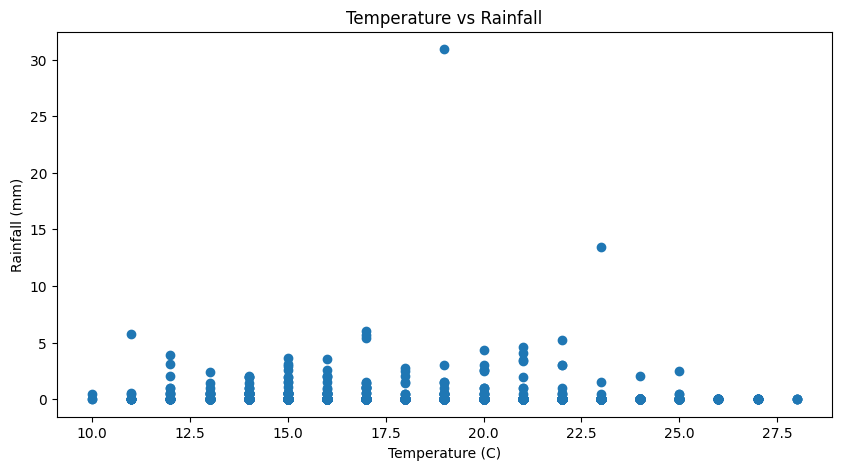

In [103]:
# Plotting the scatter plot of Temperature vs Rainfall
plt.figure(figsize=(10, 5))
plt.scatter(daily_tempRainSoil['Temp'], daily_tempRainSoil['Rain(mm)'])
plt.xlabel('Temperature (C)')
plt.ylabel('Rainfall (mm)')
plt.title('Temperature vs Rainfall')
plt.show()

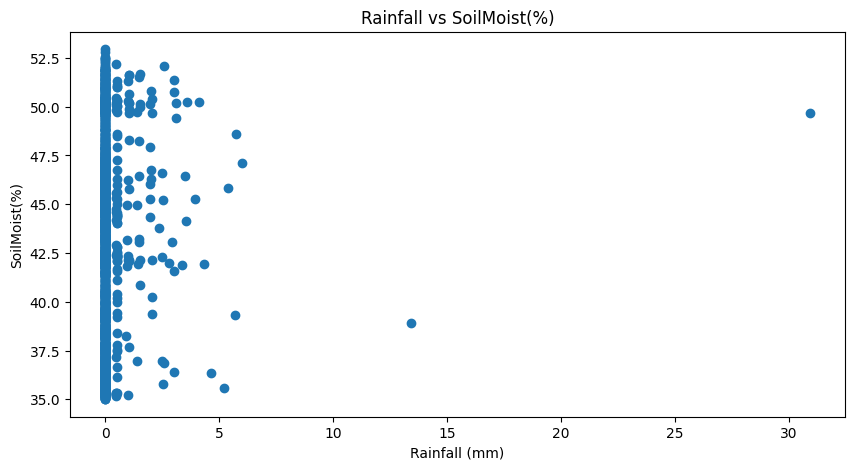

In [104]:
# Plotting the scatter plot of Temperature vs Rainfall
plt.figure(figsize=(10, 5))
plt.scatter(daily_tempRainSoil['Rain(mm)'], daily_tempRainSoil['SoilMoist'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('SoilMoist(%)')
plt.title('Rainfall vs SoilMoist(%)')
plt.show()

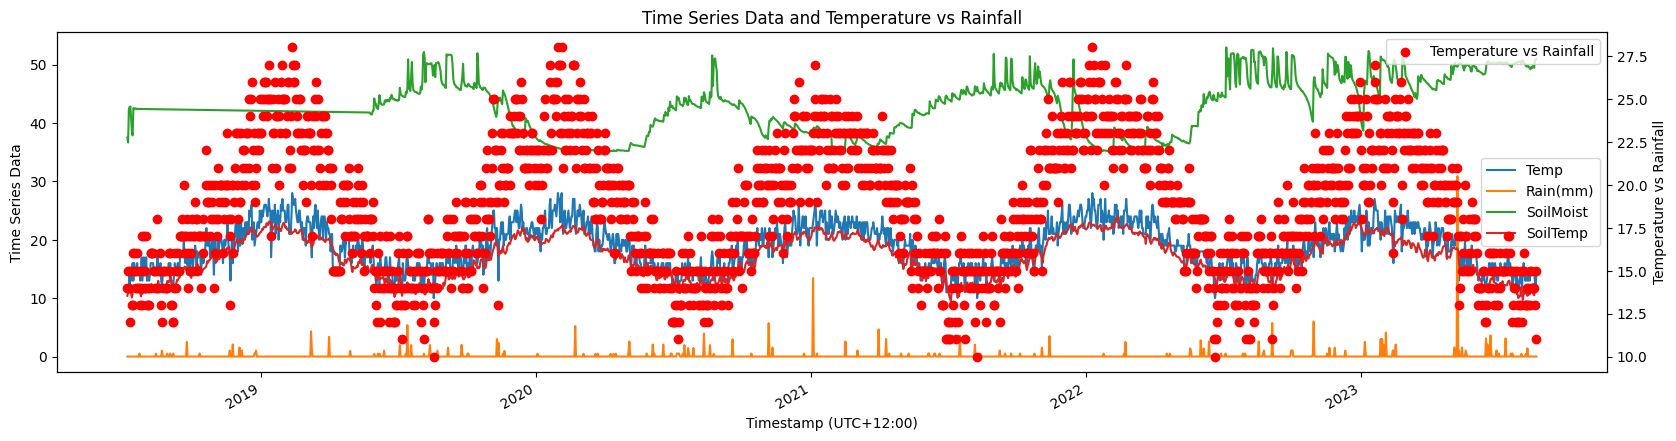

In [105]:
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plotting the time series data
daily_tempRainSoil.plot(ax=ax1, title='Time Series Data and Temperature vs Rainfall')
ax1.set_ylabel('Time Series Data')

# Create another y-axis for the scatter plot
ax2 = ax1.twinx()
ax2.scatter(daily_tempRainSoil.index, daily_tempRainSoil['Temp'], color='red', label='Temperature vs Rainfall')
ax2.set_ylabel('Temperature vs Rainfall')
ax2.set_xlabel('Timestamp (UTC+12:00)')

# Show the plot
plt.legend()
plt.show()

# Position Difference by Time-Lag Effect
- to exploring how variables change in relation to each other over time. 
- For example to calculate the difference in soil moisture at different time lags after a cyclone to observe how long it takes for soil moisture to return to normal levels.

In [106]:
temp_rain_soil['SoilMoisture_diff_24h'] = temp_rain_soil['SoilMoist'].diff(periods=24)
temp_rain_soil

,Temp,Rain(mm),SoilMoist,SoilTemp,SoilMoisture_diff_24h
Timestamp (UTC+12:00),,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,NaN
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,NaN
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,NaN
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,NaN
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,NaN
...,...,...,...,...,...
2023-08-23 00:00:00,11.0,0.0,50.77650,11.900,-0.16750
2023-08-23 01:00:00,11.0,0.0,50.82350,11.900,-0.12050
2023-08-23 02:00:00,11.0,0.0,50.82475,11.900,-0.11950


In [107]:
temp_rain_soil.describe()

,Temp,Rain(mm),SoilMoist,SoilTemp,SoilMoisture_diff_24h
count,44946.000000,44946.000000,44946.000000,44946.000000,44922.000000
mean,17.030748,0.150908,42.812377,17.232820,0.007319
std,3.723188,0.921601,4.625684,3.617801,0.983313
min,7.000000,0.000000,34.973250,9.400000,-6.033250
25%,14.000000,0.000000,39.171813,13.925000,-0.198000
50%,17.000000,0.000000,42.342971,17.146250,-0.050750
75%,20.000000,0.000000,46.088687,20.477500,-0.001985
max,29.000000,45.000000,53.104000,24.900000,11.384500


In [108]:
temp_rain_soil['SoilMoisture_diff_24h'].describe()

count    44922.000000
mean         0.007319
std          0.983313
min         -6.033250
25%         -0.198000
50%         -0.050750
75%         -0.001985
max         11.384500
Name: SoilMoisture_diff_24h, dtype: float64

# 2. Difference Between Peak and Valley
- the difference between the maximum and minimum values of soil moisture over a period.

In [109]:
temp_rain_soil['SoilMoisture_peak_to_valley'] = temp_rain_soil['SoilMoist'].max() - temp_rain_soil['SoilMoist'].min()
temp_rain_soil

,Temp,Rain(mm),SoilMoist,SoilTemp,SoilMoisture_diff_24h,SoilMoisture_peak_to_valley
Timestamp (UTC+12:00),,,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,NaN,18.13075
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,NaN,18.13075
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,NaN,18.13075
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,NaN,18.13075
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,NaN,18.13075
...,...,...,...,...,...,...
2023-08-23 00:00:00,11.0,0.0,50.77650,11.900,-0.16750,18.13075
2023-08-23 01:00:00,11.0,0.0,50.82350,11.900,-0.12050,18.13075
2023-08-23 02:00:00,11.0,0.0,50.82475,11.900,-0.11950,18.13075


<Axes: xlabel='Timestamp (UTC+12:00)'>

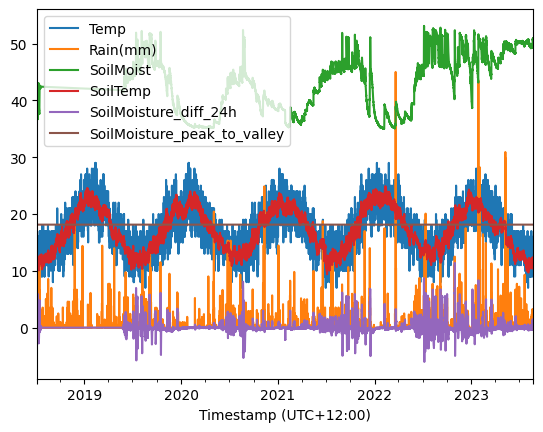

In [110]:
temp_rain_soil.plot()

                           Temp  Rain(mm)  SoilMoist  SoilTemp  \
Temp                   1.000000 -0.022245  -0.424072  0.844068   
Rain(mm)              -0.022245  1.000000   0.093529 -0.016556   
SoilMoist             -0.424072  0.093529   1.000000 -0.484740   
SoilTemp               0.844068 -0.016556  -0.484740  1.000000   
SoilMoisture_diff_24h -0.023392  0.209886   0.108275 -0.024383   

                       SoilMoisture_diff_24h  
Temp                               -0.023392  
Rain(mm)                            0.209886  
SoilMoist                           0.108275  
SoilTemp                           -0.024383  
SoilMoisture_diff_24h               1.000000  


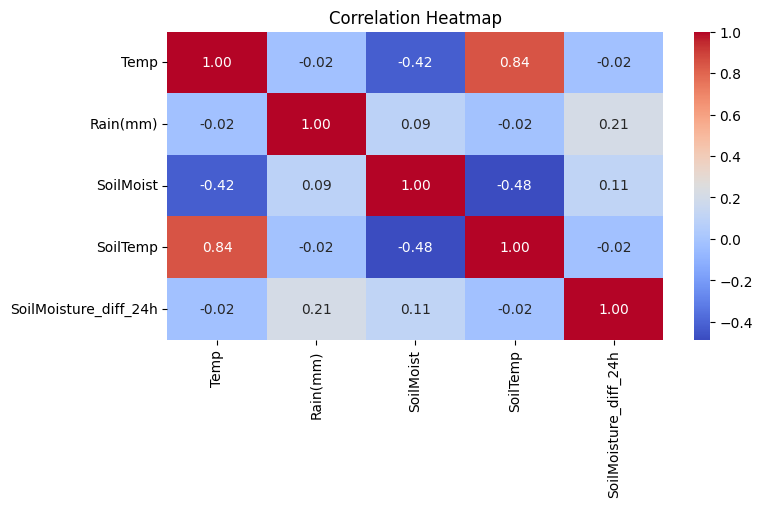

In [111]:
import seaborn as sns
temp_rain_soil.drop(columns=['SoilMoisture_peak_to_valley'], inplace=True)

# # Convert non-numeric values to NaN
# temp_rain_soil = temp_rain_soil.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = temp_rain_soil.corr()
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Soil Temperature and Temperature (0.84):
- Soil temperature and air temperature have a strong positive correlation of 0.84.
- Higher air temperatures are strongly associated with higher soil temperatures.
- This strong positive correlation indicates that changes in air temperature are closely mirrored in soil temperature, likely due to direct thermal exchange and insulation effects.

- no significant correlation between temperature and rainfall (0.02).
- The negative correlation between temperature and soil moisture


# 3. Time Response Analysis
- How soil moisture responds over time to stimulus a cyclone in 2023

<Axes: xlabel='Timestamp (UTC+12:00)'>

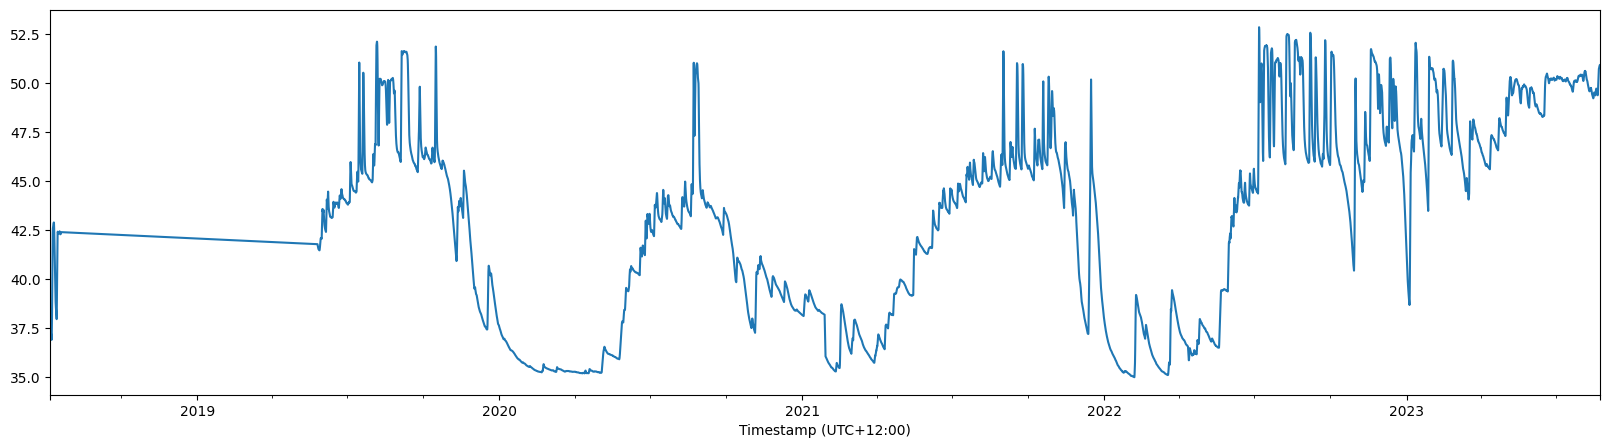

In [112]:
# rolling to see average soil moist daily
rolling_mean = temp_rain_soil['SoilMoist'].rolling(window=24).mean()  # 24-hour rolling mean
rolling_mean.plot(figsize=(20,5))

In [113]:
start_date = '2020-01-01'
end_date = '2023-12-31'
data_subset = temp_rain_soil.loc[start_date:end_date]


# Find the row with the minimum soil moisture value
extreme_low = data_subset.loc[data_subset['SoilMoist'].idxmin()]

# Print the row with extreme low soil moisture
print("Row with extreme low soil moisture:")
print(extreme_low)

Row with extreme low soil moisture:
Temp                     23.00000
Rain(mm)                  0.00000
SoilMoist                34.97325
SoilTemp                 22.90000
SoilMoisture_diff_24h    -0.04025
Name: 2022-02-05 13:00:00, dtype: float64


In [114]:
temp_rain_soil.index == '2022-10-06 01:00:00'

array([False, False, False, ..., False, False, False])

# Interaction Influence

In [115]:
corr_matrix = temp_rain_soil[['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']].corr()
corr_matrix

,Temp,Rain(mm),SoilMoist,SoilTemp
Temp,1.000000,-0.022245,-0.424072,0.844068
Rain(mm),-0.022245,1.000000,0.093529,-0.016556
SoilMoist,-0.424072,0.093529,1.000000,-0.484740
SoilTemp,0.844068,-0.016556,-0.484740,1.000000


# Event-Based Analysis
- Auckland floods (January 2023) and Cyclone Gabrielle (February 2023) 


In [116]:
cyclone_impact = temp_rain_soil.loc['2023-01-01':'2023-05-11']

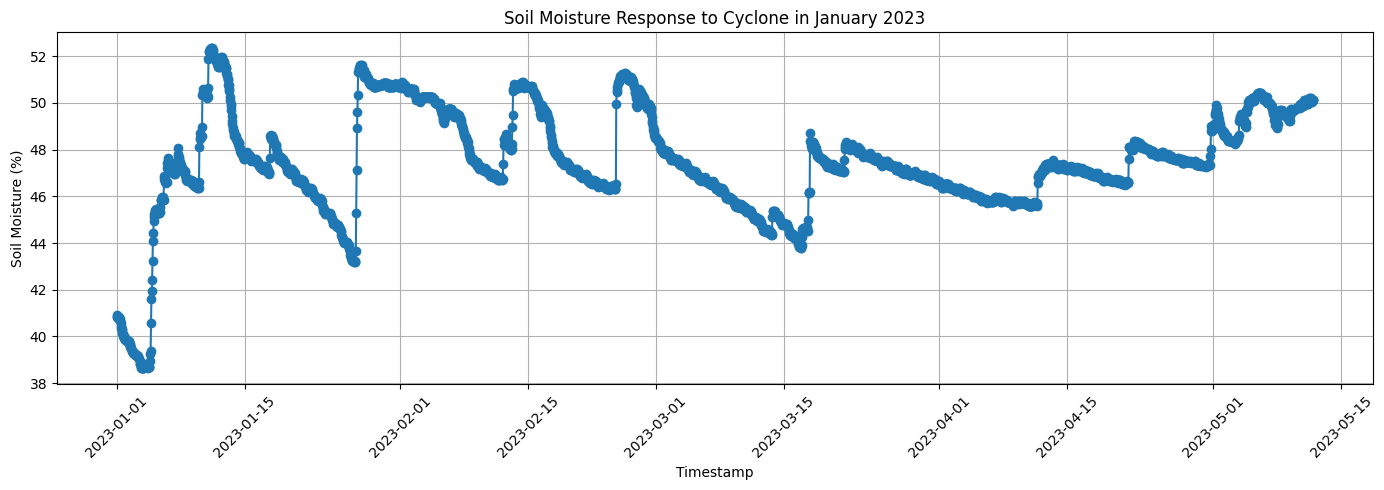

In [117]:
# Plot soil moisture to visualize the response
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(cyclone_impact.index, cyclone_impact['SoilMoist'], marker='o', linestyle='-')
plt.title('Soil Moisture Response to Cyclone in January 2023')
plt.xlabel('Timestamp')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- February 13, 2020 Auckland set to break longest dry spell on record with 40 days of no rain
- The New Zealand Drought Index showed severe meteorological drought was widespread across Northland, Auckland, and northern Waikato.

In [118]:
# Filter data for the 40 days leading up to February 13, 2020
start_date = '2019-12-31 00:00:00'
end_date = '2023-08-23 04:00:00'
drought_impact = temp_rain_soil.loc[start_date:end_date]
drought_impact

,Temp,Rain(mm),SoilMoist,SoilTemp,SoilMoisture_diff_24h
Timestamp (UTC+12:00),,,,,
2019-12-31 00:00:00,18.0,0.0,37.63725,20.100,-0.08775
2019-12-31 01:00:00,18.0,0.0,37.62850,20.025,-0.08675
2019-12-31 02:00:00,18.0,0.0,37.63825,20.000,-0.03050
2019-12-31 03:00:00,18.0,0.0,37.60975,20.000,-0.07000
2019-12-31 04:00:00,18.0,0.0,37.66500,19.900,-0.04375
...,...,...,...,...,...
2023-08-23 00:00:00,11.0,0.0,50.77650,11.900,-0.16750
2023-08-23 01:00:00,11.0,0.0,50.82350,11.900,-0.12050
2023-08-23 02:00:00,11.0,0.0,50.82475,11.900,-0.11950


C:\Users\Ying\AppData\Local\Temp\ipykernel_9240\2921378066.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Ying\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


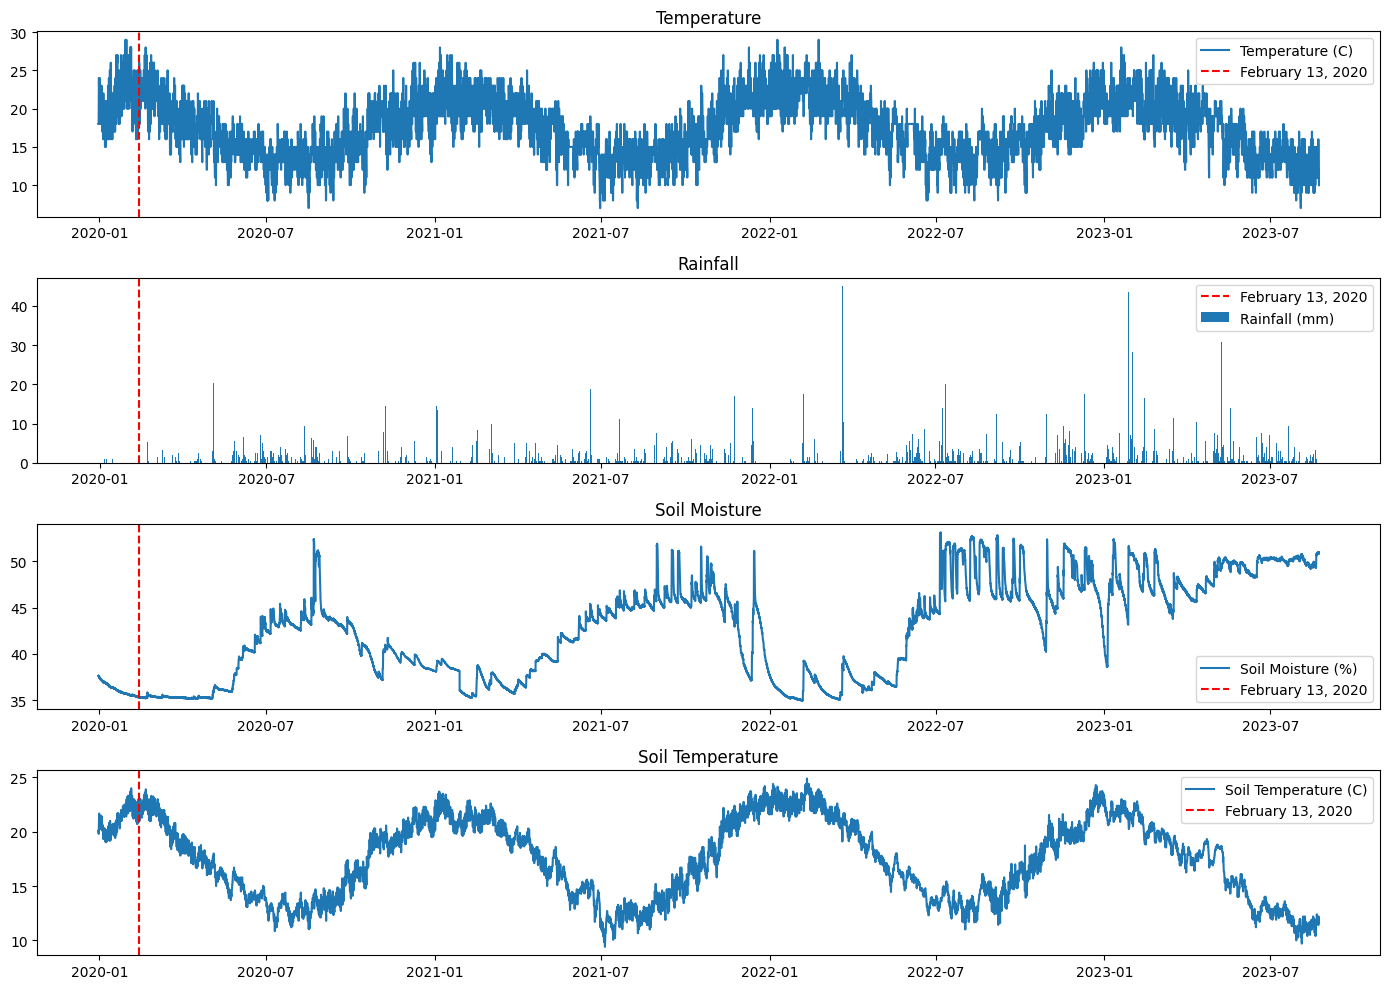

In [119]:
# Plotting temperature, rainfall, soil moisture, and soil temperature
plt.figure(figsize=(14, 10))

# Temperature
plt.subplot(4, 1, 1)
plt.plot(drought_impact.index, drought_impact['Temp'], label='Temperature (C)')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.legend()
plt.title('Temperature')

# Rainfall
plt.subplot(4, 1, 2)
plt.bar(drought_impact.index, drought_impact['Rain(mm)'], label='Rainfall (mm)')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.legend()
plt.title('Rainfall')

# Soil Moisture
plt.subplot(4, 1, 3)
plt.plot(drought_impact.index, drought_impact['SoilMoist'], label='Soil Moisture (%)')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.legend()
plt.title('Soil Moisture')

# Soil Temperature
plt.subplot(4, 1, 4)
plt.plot(drought_impact.index, drought_impact['SoilTemp'], label='Soil Temperature (C)')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.legend()
plt.title('Soil Temperature')

plt.tight_layout()
plt.show()

C:\Users\Ying\AppData\Local\Temp\ipykernel_9240\3722998858.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Ying\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


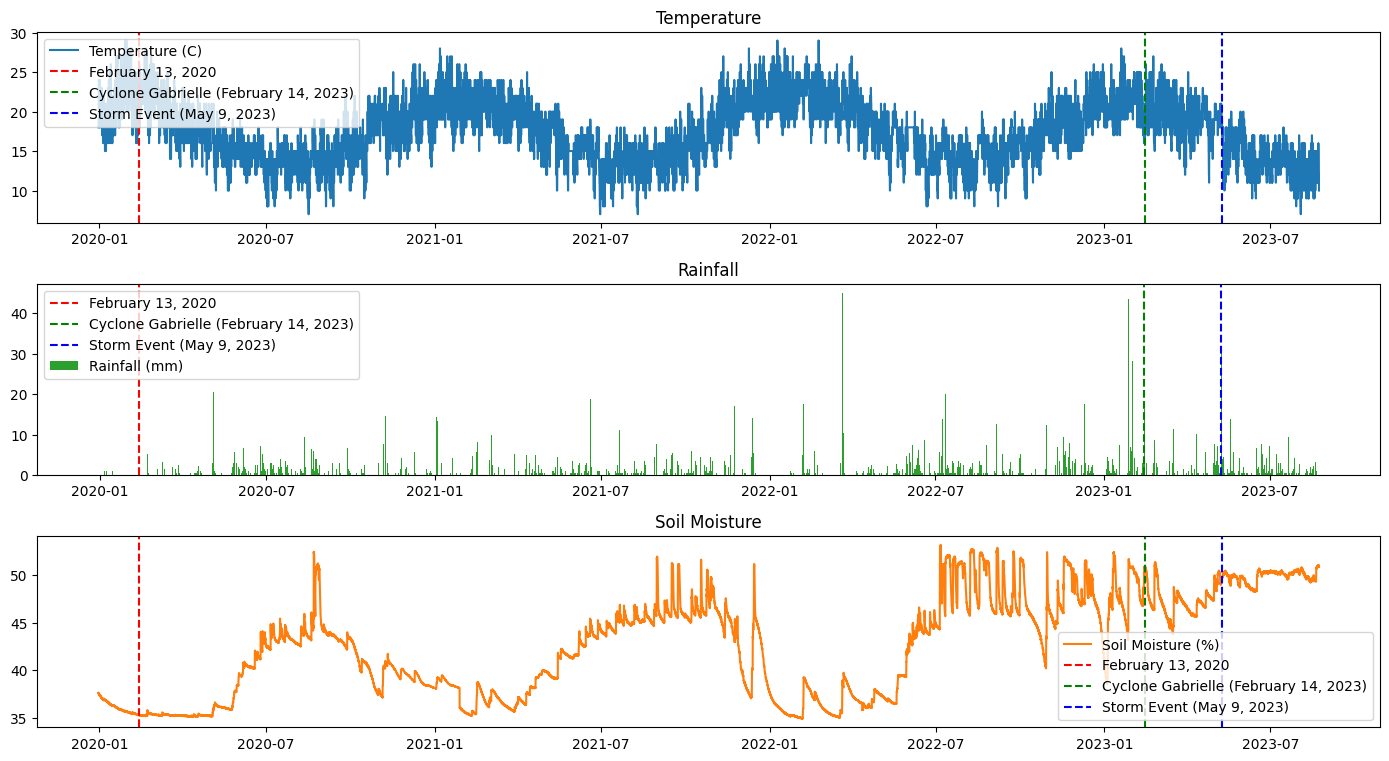

In [126]:
start_date = '2019-12-31 00:00:00'
end_date = '2023-08-23 04:00:00'
drought_impact = temp_rain_soil.loc[start_date:end_date]
cyclone_impact = temp_rain_soil.loc[start_date:end_date]
storm_impact = temp_rain_soil.loc[start_date:end_date]

plt.figure(figsize=(14, 10))
# Temperature
plt.subplot(4, 1, 1)
plt.plot(drought_impact.index, drought_impact['Temp'], label='Temperature (C)', color='tab:blue')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Temperature')

# Rainfall
plt.subplot(4, 1, 2)
plt.bar(drought_impact.index, drought_impact['Rain(mm)'], label='Rainfall (mm)', color='tab:green')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Rainfall')

# Soil Moisture
plt.subplot(4, 1, 3)
plt.plot(drought_impact.index, drought_impact['SoilMoist'], label='Soil Moisture (%)', color='tab:orange')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Soil Moisture')

plt.tight_layout()
plt.show()

In [127]:
# Calculate average values for each variable before and after events
def calculate_average_impact(data, event_date, variable):
    before_event = data[data.index < event_date][variable]
    after_event = data[data.index >= event_date][variable]
    avg_before = np.mean(before_event)
    avg_after = np.mean(after_event)
    return avg_before, avg_after

In [128]:
mt_albert_data = temp_rain_soil.loc[start_date:end_date]

events = {
    'February 13, 2020': pd.Timestamp('2020-02-13'),
    'February 14, 2023': pd.Timestamp('2023-02-14'),
    'May 9, 2023': pd.Timestamp('2023-05-09')
}

# Calculate average values for each event
for event, date in events.items():
    print(f"Event: {event}")
    avg_temp_before, avg_temp_after = calculate_average_impact(mt_albert_data, date, 'Temp')
    avg_rain_before, avg_rain_after = calculate_average_impact(mt_albert_data, date, 'Rain(mm)')
    avg_soilmoist_before, avg_soilmoist_after = calculate_average_impact(mt_albert_data, date, 'SoilMoist')
    
    print(f"Temperature change (C): {avg_temp_after - avg_temp_before:.2f}")
    print(f"Rainfall change (mm): {avg_rain_after - avg_rain_before:.2f}")
    print(f"Soil Moisture change (%): {avg_soilmoist_after - avg_soilmoist_before:.2f}")
    print()

Event: February 13, 2020
Temperature change (C): -3.69
Rainfall change (mm): 0.16
Soil Moisture change (%): 6.72

Event: February 14, 2023
Temperature change (C): -1.31
Rainfall change (mm): 0.05
Soil Moisture change (%): 7.08

Event: May 9, 2023
Temperature change (C): -3.90
Rainfall change (mm): 0.07
Soil Moisture change (%): 7.79



In [129]:
# Filter data for the cyclone impact period
cyclone_start_date = '2023-02-14'
cyclone_end_date = '2023-02-16'
cyclone_impact = temp_rain_soil.loc[cyclone_start_date:cyclone_end_date]

# Filter data for the drought impact period
drought_start_date = '2020-01-04'
drought_end_date = '2020-02-13'
drought_impact = temp_rain_soil.loc[drought_start_date:drought_end_date]

# Long-Term Trend Analysis


In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(temp_rain_soil['SoilMoist'], model='additive', period=24*7*4)  # Example for weekly seasonality
trend = decomposition.trend


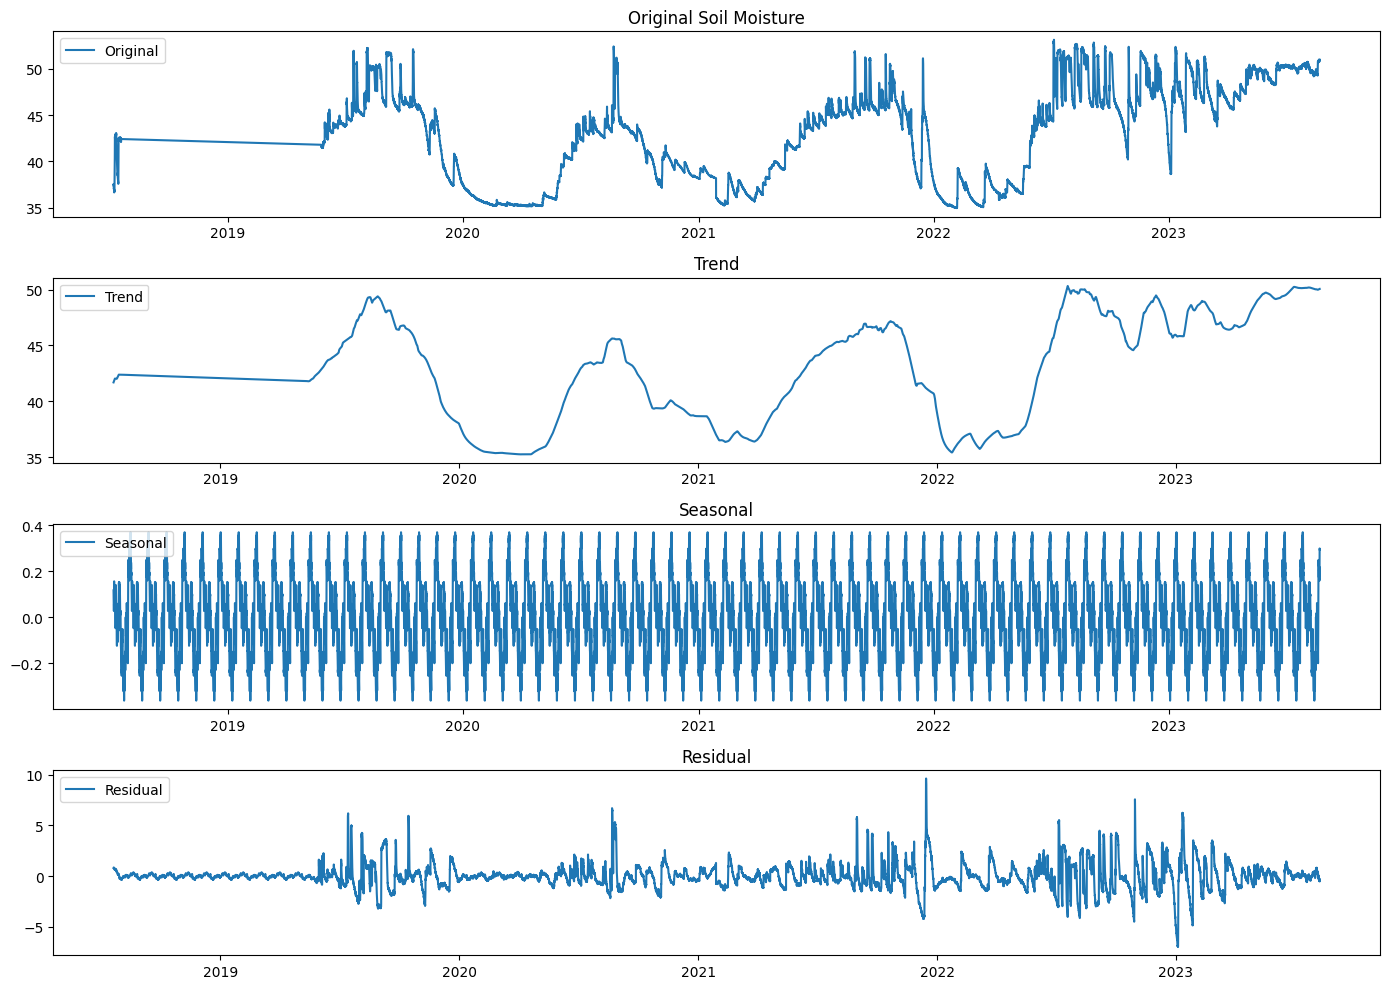

In [131]:
# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(temp_rain_soil.index, temp_rain_soil['SoilMoist'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Soil Moisture')

plt.subplot(4, 1, 2)
plt.plot(temp_rain_soil.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(temp_rain_soil.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(temp_rain_soil.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

- Original: This chart shows how much rain fell each day. Some days it rained a lot, some days a little, and some days not at all.
- Trend: This chart smooths out the daily ups and downs to show if it’s generally becoming a rainier year or a drier year overall.
- Seasonal: This chart shows regular patterns, like it rains a lot in April (spring) and not much in August (summer).
- Residual: This chart shows the weird days when it rained a lot unexpectedly or didn’t rain when it usually would.